In [ ]:
import math
#%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import json
import os
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications.resnet_v2 import decode_predictions

In [ ]:
#DOWNLOADIR = '/content/drive/MyDrive/cnn_embed/imagewang_data'
BASEDIR = '/content/drive/MyDrive/cnn_embed/imagewang_tf_records/'
#imagenette =tfds.load('imagewang/full-size',  data_dir=BASEDIR, download=True,
#                                             download_and_prepare_kwargs= {'download_dir':DOWNLOADIR})
batch_size = 10
dataset, info = tfds.load(
    'imagewang/full-size',
    split='train',
    batch_size=batch_size,
    data_dir=BASEDIR,
    with_info=True, 
    download=False)

In [ ]:
def preprocess_data(element):
  image = element['image']
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [224, 224])
  image = preprocess_input(image)
  return image

In [ ]:
image_data = dataset.map(lambda x: preprocess_data(x))

In [ ]:
for x in image_data.take(1):
  print(x.shape)

(10, 224, 224, 3)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
image_data = image_data.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
model = tf.keras.applications.ResNet50V2()
layer_name = "conv2_block1_0_conv"
#layer_outputs = [layer.output for layer in model.layers]
layer = model.get_layer(name=layer_name)
activations_map_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)

102875136/102869336 [==============================] - 1s 0us/step


In [ ]:
x = next(iter(image_data))

In [ ]:
#x = next(iter(image_data))
layer_activations = activations_map_model.predict(x)

In [ ]:
layer_activations.shape

(10, 56, 56, 256)

In [9]:
save_dir = '/content/drive/MyDrive/cnn_embed/imagewang_activations'
model_name = 'resnet50V2'
def save_data(activations, save_dir, model_name, layer_name, n_page):
    save_file = os.path.join(save_dir, model_name, layer_name, '%d.npy' %n_page)
    np.save(save_file, activations) 

In [ ]:
image_data

<MapDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
batchsize = 10
n_batch_per_page = 100
n_page = 0
counter = 0
sample_activations = []

n_batch = 0
for n_batch, batch in enumerate(image_data):

    layer_activations = activations_map_model.predict(batch)
    n_x = np.random.randint(1, layer_activations.shape[1])
    n_y = np.random.randint(1, layer_activations.shape[2])

    sample_activations.append(layer_activations[:, n_x, n_y, :])
    if (n_batch+1) % n_batch_per_page == 0:
        n_page+=1
        save_data(sample_activations, save_dir, model_name, layer_name, n_page)
        sample_activations=[]
        #sample_activations.append(layer_activations[:, n_x, n_y, :])

        print(f'num of pages processed: {n_page}')
    else: 
        pass

num of pages processed: 1
num of pages processed: 2
num of pages processed: 3
num of pages processed: 4
num of pages processed: 5
num of pages processed: 6
num of pages processed: 7
num of pages processed: 8
num of pages processed: 9
num of pages processed: 10
num of pages processed: 11
num of pages processed: 12
num of pages processed: 13
num of pages processed: 14


In [22]:
file_name = os.path.join(save_dir, model_name, layer_name, '16.npy')
file = np.load(filcv  e_name)

In [ ]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, layer_activations):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


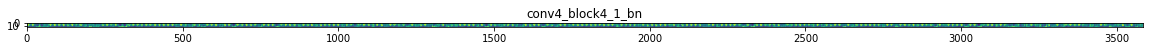

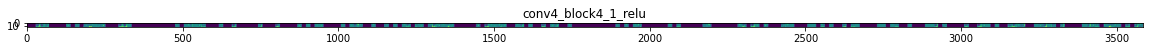

In [ ]:
layer_name_plot = layer_names[123:125]
feature_maps_plot = layer_activations[123:125]
for layer_name, feature_map in zip(layer_name_plot, feature_maps_plot):  
      k = feature_map.shape[-1]  
      size = feature_map.shape[1]
      image_belt = np.zeros((size, size*k))
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(feature_image, 0, 255).astype('uint8')
        image_belt[:, i * size : (i + 1) * size] = feature_image  
      scale = 20. / k
      plt.figure( figsize=(scale * k, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow( image_belt, aspect='auto')

In [ ]:
!